install.packages('Seurat')
install.packages("tidyverse")
install.packages("ggplot2")

In [1]:
library(Seurat)
library(ggplot2)
library(tidyverse)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load data

In [2]:
gctb2 = readRDS("/home/linxy29/data/maester/oagct/gctb2.rds")
gct86_numbat = read_tsv("/home/linxy29/data/maester/oagct/gct_numbat/gct86_refHCA_cnv/clone_post_2.tsv") %>% mutate(cell = str_c("L86_", cell)) %>% mutate(clone = str_c("L86_C", clone_opt))
gct98_numbat = read_tsv("/home/linxy29/data/maester/oagct/gct_numbat/gct98_refHCA_cnv/clone_post_2.tsv") %>% mutate(cell = str_c("L98_", cell)) %>% mutate(clone = str_c("L98_C", clone_opt))
output_folder = "/home/linxy29/data/maester/oagct/gct_numbat/plot/"

Rows: 8786 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (2): cell, compartment_opt
dbl (12): clone_opt, GT_opt, p_opt, p_1, p_2, p_x_1, p_x_2, p_y_1, p_y_2, p_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 9354 Columns: 14
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): cell, GT_opt, compartment_opt
dbl (11): clone_opt, p_opt, p_1, p_2, p_x_1, p_x_2, p_y_1, p_y_2, p_cnv, p_c...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `s

In [3]:
gct86_numbat_refNormal = read_tsv("/home/linxy29/data/maester/oagct/gct_numbat/gct86_refNormal_cnv/clone_post_2.tsv") %>% mutate(clone = str_c("L86_C", clone_opt))
gct98_numbat_refNormal = read_tsv("/home/linxy29/data/maester/oagct/gct_numbat/gct98_refNormal_cnv/clone_post_2.tsv") %>% mutate(clone = str_c("L98_C", clone_opt))

Rows: 5620 Columns: 17
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): cell, GT_opt, compartment_opt
dbl (14): clone_opt, p_opt, p_1, p_2, p_3, p_x_1, p_x_2, p_x_3, p_y_1, p_y_2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 5939 Columns: 17
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): cell, GT_opt, compartment_opt
dbl (14): clone_opt, p_opt, p_1, p_2, p_3, p_x_1, p_x_2, p_x_3, p_y_1, p_y_2...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types o

In [4]:
head(gct98_numbat_refNormal)

cell,clone_opt,GT_opt,p_opt,p_1,p_2,p_3,p_x_1,p_x_2,p_x_3,p_y_1,p_y_2,p_y_3,p_cnv,p_cnv_x,p_cnv_y,compartment_opt,clone
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
L98_AAACCCAAGTCAGGGT-1,3,"1c,15a",0.9225498,1.007437e-10,7.745017e-02,9.225498e-01,0.2085191,0.1039028,6.875781e-01,4.629655e-10,3.571429e-01,6.428571e-01,1.000000e+00,0.7914809,1.000000e+00,tumor,L98_C3
L98_AAACCCACACGCTTAA-1,1,NA,0.9646825,9.646825e-01,3.530136e-02,1.614333e-05,0.6649000,0.3313123,3.787732e-03,9.632165e-01,3.536876e-02,1.414750e-03,3.531751e-02,0.3351000,3.678351e-02,normal,L98_C1
L98_AAACCCACACGTAACT-1,1,NA,0.4194739,4.194739e-01,2.090192e-01,3.715069e-01,0.4194739,0.2090192,3.715069e-01,5.000000e-01,2.500000e-01,2.500000e-01,5.805261e-01,0.5805261,5.000000e-01,tumor,L98_C1
L98_AAACGAAAGAACAAGG-1,1,NA,0.9999030,9.999030e-01,9.703989e-05,1.028169e-14,0.6674280,0.3325720,3.398636e-08,9.999025e-01,9.737308e-05,1.009564e-07,9.703989e-05,0.3325720,9.747404e-05,normal,L98_C1
L98_AAACGAAAGTCCCTAA-1,1,NA,0.9978252,9.978252e-01,2.174357e-03,4.787574e-07,0.6672923,0.3325043,2.033665e-04,9.970351e-01,2.180096e-03,7.848347e-04,2.174836e-03,0.3327077,2.964931e-03,normal,L98_C1
L98_AAACGAAAGTTTCGGT-1,3,"1c,15a",0.8691766,8.128608e-02,4.953733e-02,8.691766e-01,0.2382812,0.1187329,6.429859e-01,2.783335e-01,1.702044e-01,5.514621e-01,9.187139e-01,0.7617188,7.216665e-01,tumor,L98_C3


## Plots

General description about two gctb samples.

In [5]:
set.seed(123)
gctb2 <- RunPCA(object = gctb2)
gctb2 <- FindNeighbors(object = gctb2, dims = 1:30)
gctb2 <- FindClusters(object = gctb2)
gctb2 <- RunUMAP(object = gctb2, dims = 1:30)

PC_ 1 
Positive:  SPARC, CALD1, COL6A2, S100A16, CAVIN3, S100A13, FN1, IL13RA2, COL1A1, KRT18 
	   COL1A2, SERPINH1, COL6A1, IGFBP7, PXDN, TPM2, COL4A2, TIMP1, RND3, NNMT 
	   PCOLCE, PAGE2, CNN3, PAGE2B, MFAP2, PAGE5, COL4A1, BGN, MDK, COL3A1 
Negative:  C1QC, C1QA, C1QB, MS4A6A, CD14, FCGR3A, AIF1, HLA-DQA2, CD163, HLA-DPB1 
	   HLA-DPA1, MS4A7, FOLR2, MS4A4A, MRC1, CYBB, FCGR2A, HLA-DRA, VSIG4, CTSS 
	   TYROBP, VAMP8, S100A9, CD74, LAPTM5, HLA-DMB, CCL13, HLA-DMA, HLA-DQA1, HLA-DRB1 
PC_ 2 
Positive:  CST3, CTSB, GRN, PSAP, FCER1G, CTSL, CREG1, FTL, MARCKS, FTH1 
	   PLTP, DAB2, CD68, CTSZ, GPNMB, RAB13, SELENOP, ASAH1, RAB32, PLAUR 
	   PLAU, LY96, LGMN, APOE, IFI30, FUCA1, PLD3, ATP6V0B, CD14, TMEM176B 
Negative:  CD3D, CD2, CD52, CD3E, CCL5, GZMK, TRBC2, IL32, GZMA, LTB 
	   NKG7, CD27, CST7, TIGIT, TRAC, CD69, CD7, IFNG, TRBC1, RAC2 
	   CORO1A, CD48, SH2D1A, TRGC2, CTSW, TRDC, XCL2, ITM2A, CRIP1, DUSP2 
PC_ 3 
Positive:  PLVAP, CALCRL, RAMP2, CLEC14A, ECSCR, PODXL, RAMP3, PCDH

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7537
Number of edges: 281311

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8843
Number of communities: 20
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:02:44 UMAP embedding parameters a = 0.9922 b = 1.112

18:02:44 Read 7537 rows and found 30 numeric columns

18:02:44 Using Annoy for neighbor search, n_neighbors = 30

18:02:44 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:02:45 Writing NN index file to temp file /tmp/RtmpQpPdUS/file535d3d80339f

18:02:45 Searching Annoy index using 1 thread, search_k = 3000

18:02:47 Annoy recall = 100%

18:02:47 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

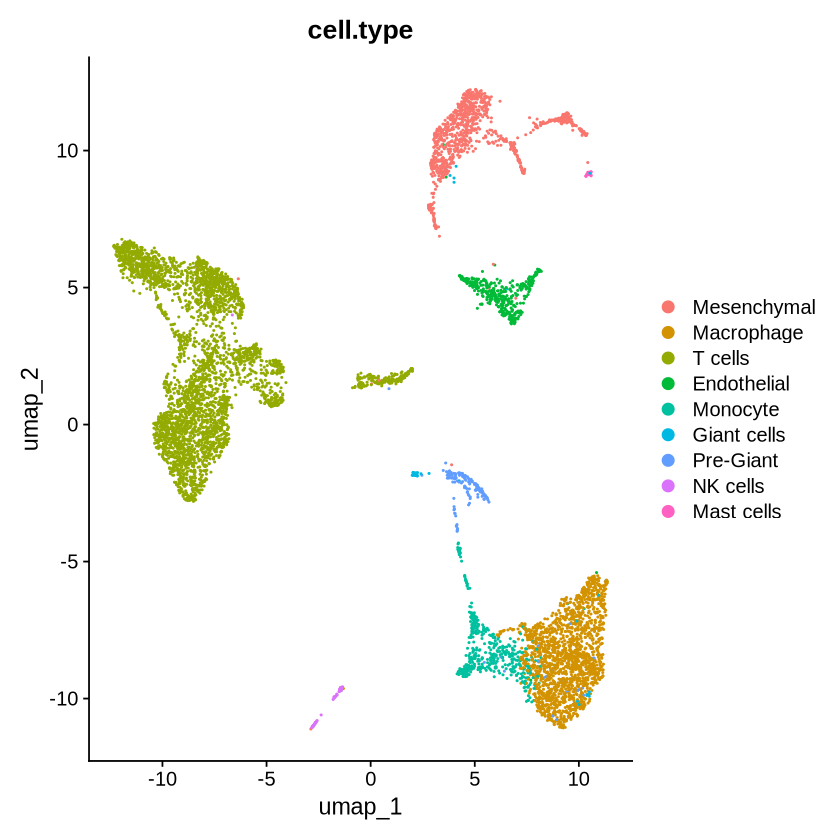

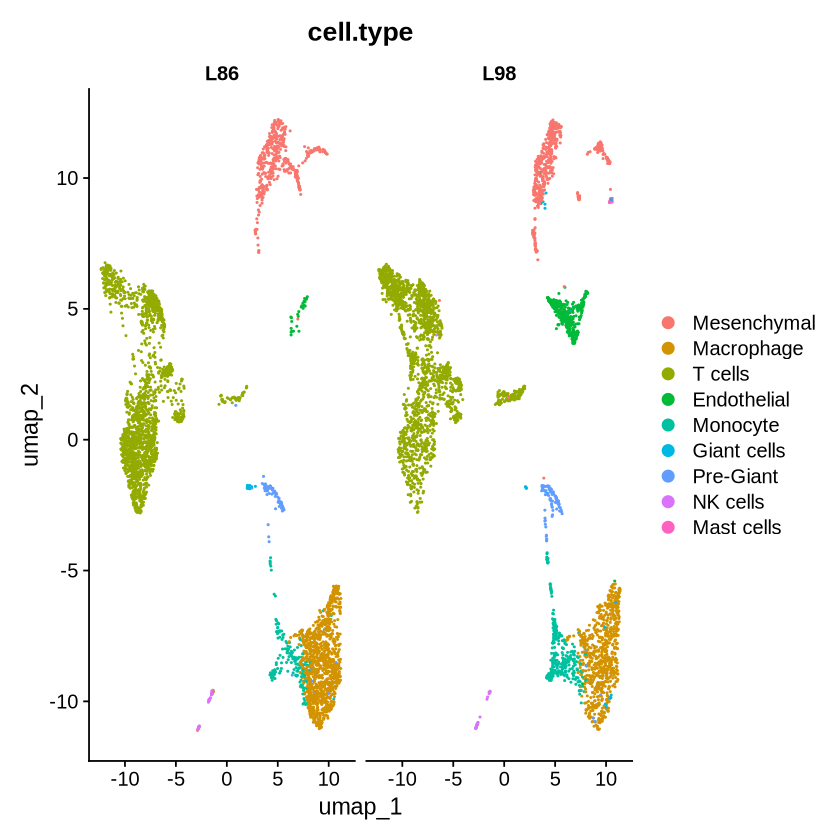

In [6]:
pCT = DimPlot(gctb2, group.by = "cell.type")
pCT
ggsave(paste0(output_folder, "gctb2_cellType.pdf"), width = 5, height = 5)
pCT_split = DimPlot(gctb2, group.by = "cell.type", split.by = 'orig.ident')
pCT_split
ggsave(paste0(output_folder, "gctb2_cellType_split.pdf"), width = 10, height = 5)

In [7]:
head(gct86_numbat)

cell,clone_opt,GT_opt,p_opt,p_1,p_2,p_x_1,p_x_2,p_y_1,p_y_2,p_cnv,p_cnv_x,p_cnv_y,compartment_opt,clone
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
L86_AAACCCACAGTTAGGG-1,1,NA,0.9863168,0.9863168,0.013683186,0.9156922,0.08430782,0.8690522,0.13094782,0.013683186,0.08430782,0.13094782,normal,L86_C1
L86_AAACCCAGTGCACATT-1,1,NA,0.9239878,0.9239878,0.076012199,0.8849928,0.11500723,0.6123546,0.38764539,0.076012199,0.11500723,0.38764539,normal,L86_C1
L86_AAACCCAGTGTGTTTG-1,1,NA,0.9371507,0.9371507,0.062849275,0.9156878,0.08431221,0.5785822,0.42141778,0.062849275,0.08431221,0.42141778,normal,L86_C1
L86_AAACCCAGTTATGTGC-1,1,NA,0.9924531,0.9924531,0.007546891,0.9152972,0.08470282,0.9240678,0.07593223,0.007546891,0.08470282,0.07593223,normal,L86_C1
L86_AAACCCAGTTGAGGAC-1,1,NA,0.9550039,0.9550039,0.044996144,0.9156922,0.08430782,0.6614882,0.33851184,0.044996144,0.08430782,0.33851184,normal,L86_C1
L86_AAACCCAGTTTCACTT-1,1,NA,0.7157060,0.7157060,0.284293976,0.9156921,0.08430794,0.1881703,0.81182973,0.284293976,0.08430794,0.81182973,normal,L86_C1


In [8]:
gctb2_anno = data.frame(cell = Cells(gctb2), group = gctb2$cell.type)
write_csv(gctb2_anno, file = "/home/linxy29/data/maester/oagct/gctb2_anno.csv")

Numbat results using HCA data as reference.

In [9]:
gct_numbat = rbind(gct86_numbat, gct98_numbat)
clone_meta = data.frame(cell = Cells(gctb2)) %>% left_join(gct_numbat)
head(clone_meta)
dim(clone_meta)
dim(gctb2)

Joining with `by = join_by(cell)`


,cell,clone_opt,GT_opt,p_opt,p_1,p_2,p_x_1,p_x_2,p_y_1,p_y_2,p_cnv,p_cnv_x,p_cnv_y,compartment_opt,clone
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,L86_AAACCCAGTGCACATT-1,1,NA,0.9239878,9.239878e-01,0.076012199,8.849928e-01,0.11500723,0.6123546,0.38764539,0.076012199,0.11500723,0.38764539,normal,L86_C1
2,L86_AAACCCAGTTATGTGC-1,1,NA,0.9924531,9.924531e-01,0.007546891,9.152972e-01,0.08470282,0.9240678,0.07593223,0.007546891,0.08470282,0.07593223,normal,L86_C1
3,L86_AAACCCAGTTTCACTT-1,1,NA,0.7157060,7.157060e-01,0.284293976,9.156921e-01,0.08430794,0.1881703,0.81182973,0.284293976,0.08430794,0.81182973,normal,L86_C1
4,L86_AAACGAAAGGAGCTGT-1,2,1,1.0000000,5.046477e-09,0.999999995,3.261478e-07,0.99999967,0.0152372,0.98476280,0.999999995,0.99999967,0.98476280,tumor,L86_C2
5,L86_AAACGAACAATGTCTG-1,1,NA,0.9153055,9.153055e-01,0.084694534,9.153055e-01,0.08469453,0.5000000,0.50000000,0.084694534,0.08469453,0.50000000,normal,L86_C1
6,L86_AAACGCTAGATGGGCT-1,1,NA,0.8357136,8.357136e-01,0.164286422,9.147999e-01,0.08520015,0.3214693,0.67853068,0.164286422,0.08520015,0.67853068,normal,L86_C1


[1] 7537   15

[1] 2000 7537

In [10]:
gctb2$cnv_clone = clone_meta$clone

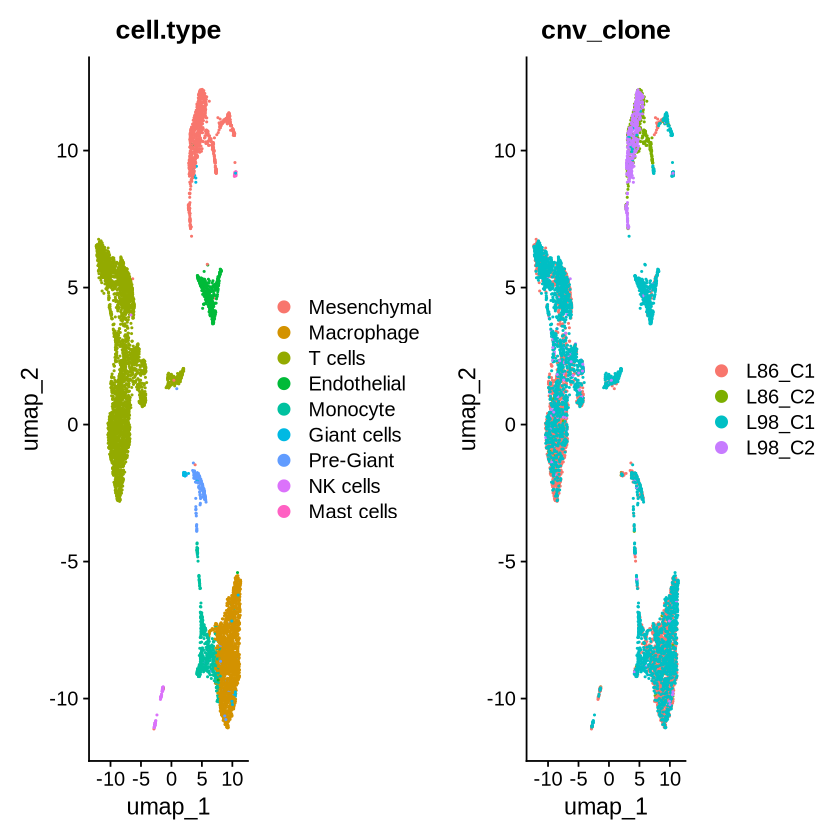

In [11]:
pCNV = DimPlot(gctb2, group.by = 'cnv_clone')
pCT + pCNV
ggsave(paste0(output_folder, "gctb2_cnvClone.pdf"), width = 10, height = 5)

Numbat results using normal cells as reference.

In [12]:
gct_numbat_mes = rbind(gct86_numbat_refNormal, gct98_numbat_refNormal)
clone_meta_mes = data.frame(cell = Cells(gctb2)) %>% left_join(gct_numbat_mes)
head(clone_meta_mes)
dim(clone_meta_mes)
dim(gctb2)

Joining with `by = join_by(cell)`


,cell,clone_opt,GT_opt,p_opt,p_1,p_2,p_3,p_x_1,p_x_2,p_x_3,p_y_1,p_y_2,p_y_3,p_cnv,p_cnv_x,p_cnv_y,compartment_opt,clone
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,L86_AAACCCAGTGCACATT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,L86_AAACCCAGTTATGTGC-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,L86_AAACCCAGTTTCACTT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,L86_AAACGAAAGGAGCTGT-1,3,"1f,7b",0.7521943,7.041677e-10,0.2478057,0.7521943,1.043976e-07,0.5163001,0.4836998,0.006585231,0.2342959,0.7591188,1,0.9999999,0.9934148,tumor,L86_C3
5,L86_AAACGAACAATGTCTG-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,L86_AAACGCTAGATGGGCT-1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 7537   18

[1] 2000 7537

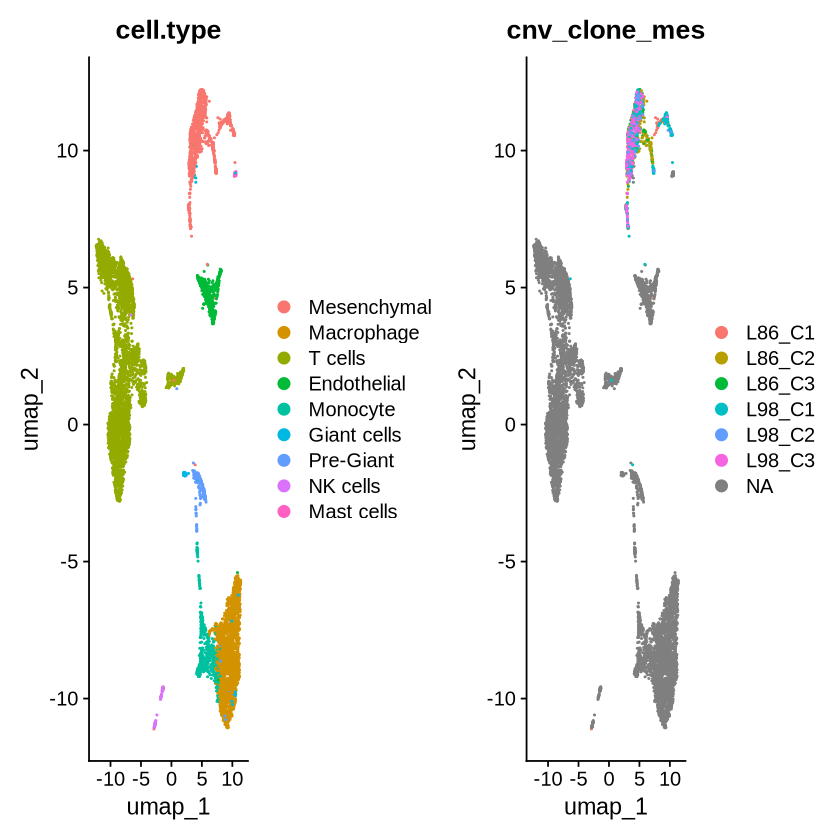

In [13]:
gctb2$cnv_clone_mes = clone_meta_mes$clone
pCNV = DimPlot(gctb2, group.by = 'cnv_clone_mes')
pCT + pCNV
ggsave(paste0(output_folder, "gctb2_cnvClone_refNormal.pdf"), width = 10, height = 5)